# Machine Listening (Fall 2020)
# Lab7: Improving Machine Learning

# lab7 - 1 : L1 norm & L2 norm on linear regression

make data for linear regression

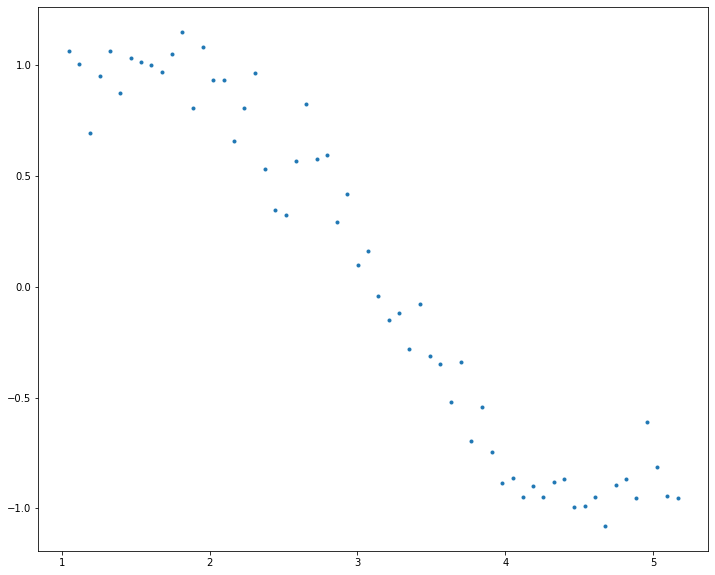

In [37]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

# Make fake data
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

# Make power n x data
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i

In [38]:
data

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459e+00,1.585938e+00,1.660790e+00,1.739176e+00,1.821260e+00,1.907219e+00,1.997235e+00
1,1.117011,1.006086,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173e+00,3.023942e+00,3.377775e+00,3.773011e+00,4.214494e+00,4.707635e+00,5.258479e+00
2,1.186824,0.695374,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717e+00,5.544505e+00,6.580351e+00,7.809718e+00,9.268760e+00,1.100039e+01,1.305552e+01
3,1.256637,0.949799,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277e+00,9.819710e+00,1.233981e+01,1.550666e+01,1.948625e+01,2.448714e+01,3.077145e+01
4,1.326450,1.063496,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,1.271214e+01,1.686202e+01,2.236663e+01,2.966822e+01,3.935342e+01,5.220035e+01,6.924117e+01
5,1.396263,0.876795,1.949551,2.722087,3.800751,5.306850,7.409760,10.345976,14.445708,2.017001e+01,2.816265e+01,3.932248e+01,5.490454e+01,7.666120e+01,1.070392e+02,1.494550e+02
6,1.466077,1.034349,2.149381,3.151156,4.619837,6.773034,9.929787,14.557828,21.342890,3.129031e+01,4.587399e+01,6.725479e+01,9.860066e+01,1.445561e+02,2.119303e+02,3.107061e+02
7,1.535890,1.015673,2.358957,3.623098,5.564680,8.546734,13.126841,20.161381,30.965658,4.755984e+01,7.304667e+01,1.121916e+02,1.723140e+02,2.646553e+02,4.064813e+02,6.243104e+02
8,1.605703,1.000035,2.578282,4.139955,6.647537,10.673970,17.139225,27.520503,44.189752,7.095561e+01,1.139336e+02,1.829436e+02,2.937530e+02,4.716801e+02,7.573781e+02,1.216124e+03
9,1.675516,0.968332,2.807354,4.703767,7.881237,13.205140,22.125424,37.071504,62.113901,1.040728e+02,1.743757e+02,2.921693e+02,4.895344e+02,8.202227e+02,1.374296e+03,2.302656e+03


fit and show linear regression models while extending power with no regularization

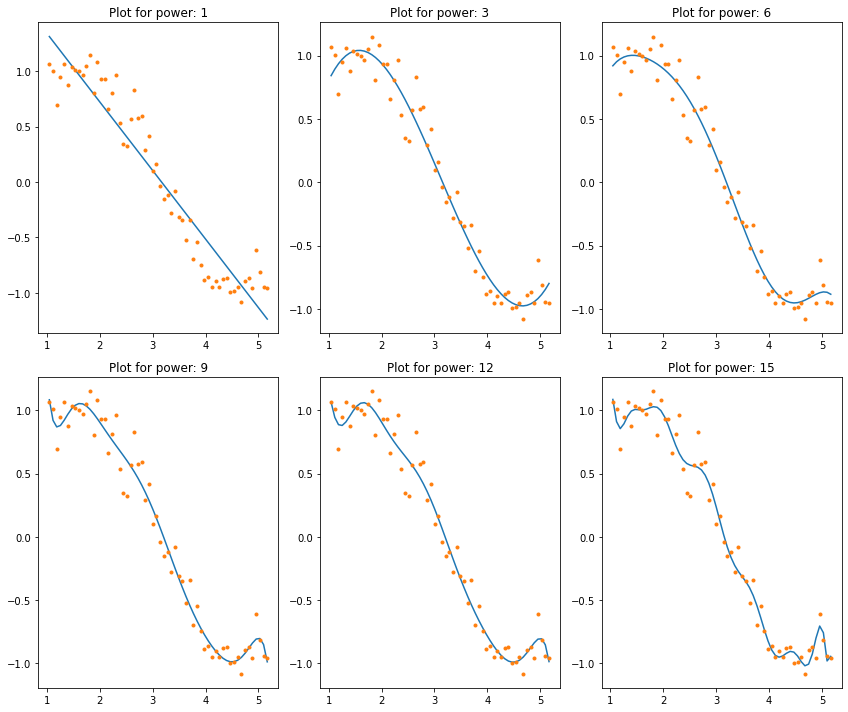

In [39]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

fit and show linear regression models with L1 regularization (lasso regression in linear regression) with poewr 15 while increasing alpha

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47835738259036853, tolerance: 0.00369480384218441
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4782818399057239, tolerance: 0.00369480384218441
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47079330190410706, tolerance: 0.00369480384218441
  positive)


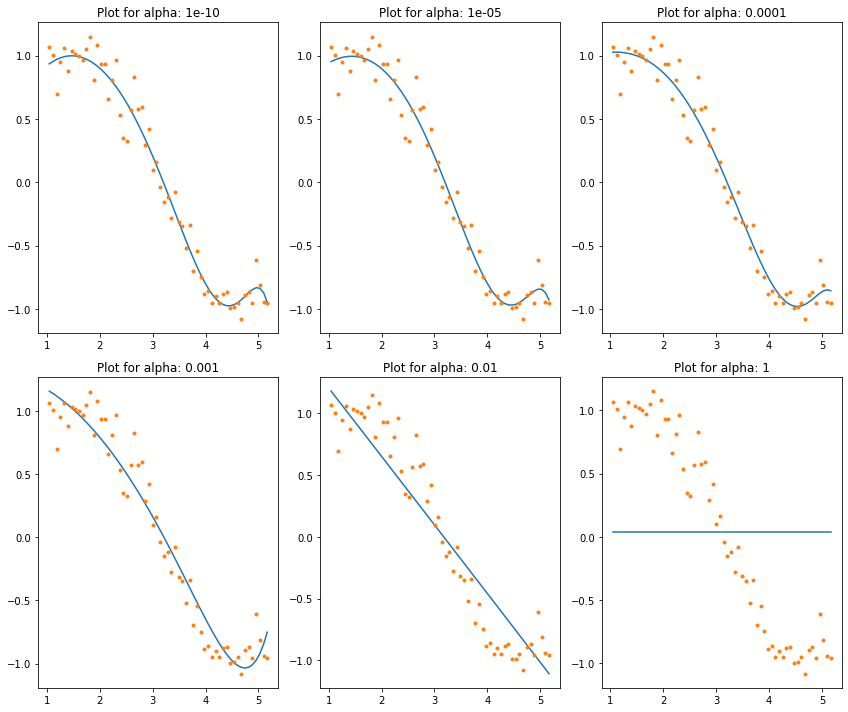

In [11]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

fit and show linear regression models with L2 regularization (ridge regression in linear regression) with poewr 15 while increasing alpha

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.81609e-17): result may not be accurate.
  overwrite_a=True).T


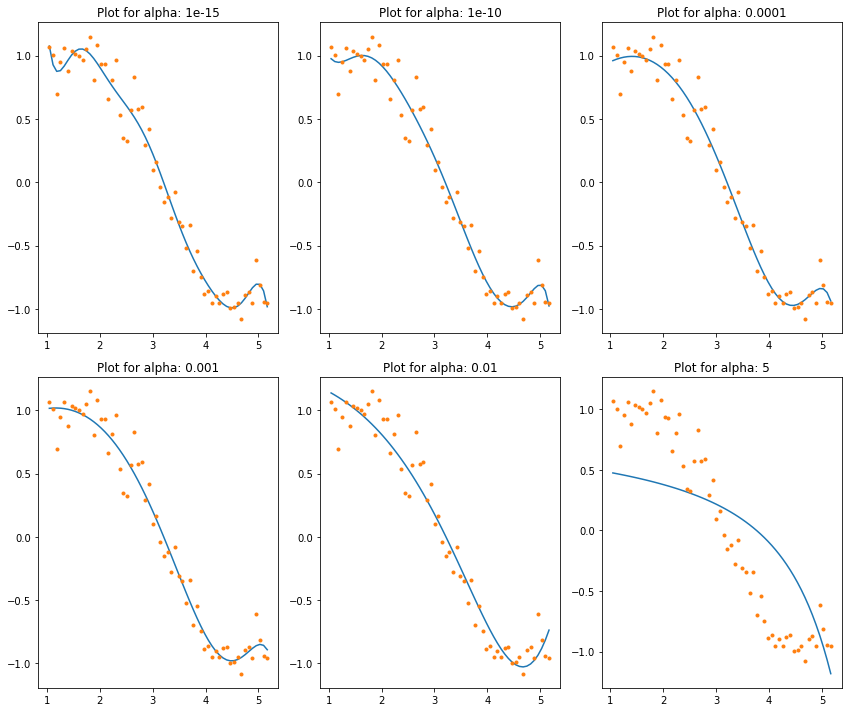

In [12]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

# lab7 - 2 : ADAM on linear regression

define functions

In [40]:
def h(a,b,x): #hypothesis function
    return a*x+b

def mse(a,b,x,y): #loss function
    return np.mean((h(a,b,x) - y)**2)

def gradient(a,b,x,y): #mse derivatives
    return np.mean(x*(a*x+b-y), axis=-1), np.mean(a*x+b-y, axis=-1)

def generate_data(nb): #generate data with noise
    x = np.array([])
    y = np.array([])
    for i in range(nb):
        x = np.insert(x, len(x), i)
        y = np.insert(y, len(y), i + np.random.rand()*20)
    return x,y

def shuffle(x,y):
    s = np.arange(len(x))
    np.random.shuffle(s)
    return x[s], y[s]



def vanilla_gradient_descent(a,b,x,y,lr=1e-5,epsilon=1e-4):
    prev_error = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a,b,x,y)

        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        prev_error = mse(a,b,x,y)
        error = np.insert(error, len(error), prev_error)

        a -= lr * gradient_a
        b -= lr * gradient_b
    return a, b, error


def adam_gradient_descent(a, b, x, y, lr=1e-5, b1=0.9, b2=0.999, epsilon=1e-4):
    prev_error = 0
    m_a = v_a = m_b = v_b = 0
    moment_m_a = moment_v_a = moment_m_b = moment_v_b = 0
    t = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a, b, x, y)

        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        t += 1
        prev_error = mse(a, b, x, y)
        error = np.insert(error, len(error), prev_error)

        m_a = b1 * m_a + (1-b1)*gradient_a
        v_a = b2 * v_a + (1-b2)*gradient_a**2
        m_b = b1 * m_b + (1-b1)*gradient_b
        v_b = b2 * v_b + (1-b2)*gradient_b**2
        moment_m_a = m_a / (1-b1**t)
        moment_v_a = v_a / (1-b2**t)
        moment_m_b = m_b / (1-b1**t)
        moment_v_b = v_b / (1-b2**t)
        a -= (lr*moment_m_a) / (moment_v_a**0.5 + 1e-8)
        b -= (lr*moment_m_b) / (moment_v_b**0.5 + 1e-8)
    return a, b, error

make fake data

In [41]:
x, y = generate_data(1000)
# normalization
x -= np.mean(x)
x /= np.std(x)
y -= np.mean(y)
y /= np.std(y)

a_0, b_0 = np.random.rand(), np.random.rand()

show error plot for vanilla gradient descent

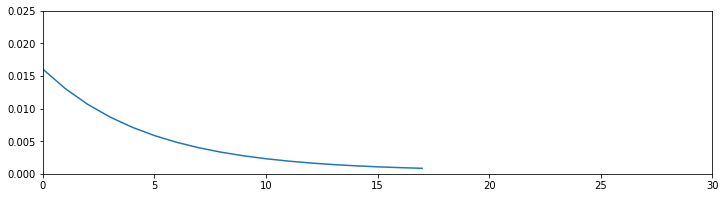

a = 0.9987062250953471 , b = 0.018751485281153498


In [44]:
'''
vanilla
'''
a, b, error = vanilla_gradient_descent(a_0, b_0, x, y, lr=1e-1)
prediction = h(a,b,x)

#plt.figure(figsize=(12, 3))
#plt.plot(x, prediction)
#plt.show()

plt.figure(figsize=(12, 3))
plt.xlim([0,30])
plt.ylim([0,0.025])
plt.plot(error)
plt.show()


print("a =",a,", b =",b)

show error plot for adam gradient descent

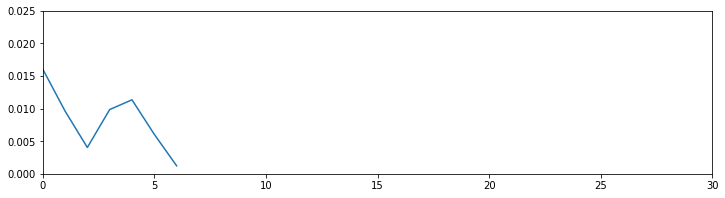

a = 1.0088918562236049 , b = 0.027033476066990705


In [45]:
'''
adam
'''
a, b, error = adam_gradient_descent(a_0, b_0, x, y, lr=1e-1)
prediction = h(a,b,x)


#plt.figure(figsize=(12, 3))
#plt.plot(x, prediction)
#plt.show()

plt.figure(figsize=(12, 3))
plt.xlim([0,30])
plt.ylim([0,0.025])
plt.plot(error)
plt.show()

print("a =",a,", b =",b)